### Streaming

**Methods**: `stream()` and `astream()`

* These methods are sync and async methods for streaming back results.

**Additional parameters in streaming modes for graph state**

* **values**: This streams the full state of the graph after each node is called.
* **updates**: This streams updates to the state of the graph after each node is called.

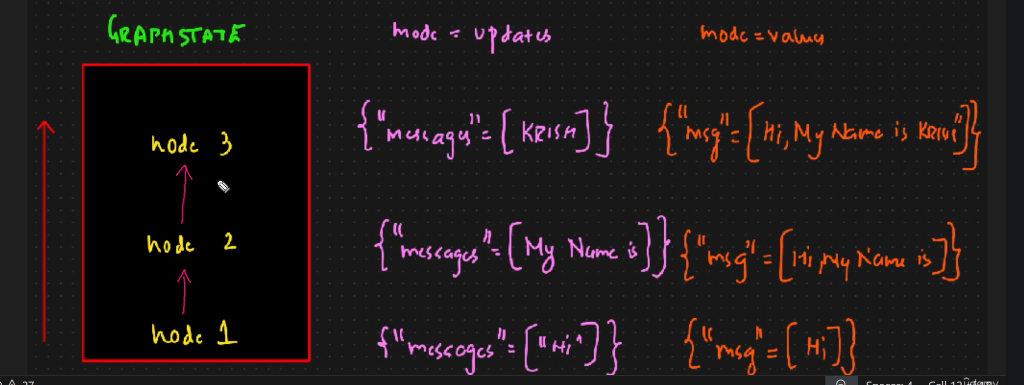

In [ ]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]

import os
from dotenv import load_dotenv
load_dotenv()

# os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

from langchain_groq import ChatGroq
llm=ChatGroq(model="llama-3.3-70b-versatile")
llm.invoke("Hello")
# AIMessage(content='Hello. How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.009923219, 'prompt_time': 0.012180705, 'queue_time': 0.064263924, 'total_time': 0.022103924}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-ddbeeefb-8b1d-4498-b8d6-b89952de9013-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})
llm.invoke("Hey I am Apoorv and i like to play cricket")
# AIMessage(content="Nice to meet you, Apoorv! Cricket is an amazing sport, and I'm sure you must have a lot of fun playing it. Are you a fan of any particular team or player? Do you have a favorite format of the game, like Test matches, ODIs, or T20s?", response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 47, 'total_tokens': 110, 'completion_time': 0.135073775, 'prompt_time': 0.011268557, 'queue_time': 0.045646543, 'total_time': 0.146342332}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-ee382127-851d-47bb-9392-384541d941cd-0', usage_metadata={'input_tokens': 47, 'output_tokens': 63, 'total_tokens': 110})


AIMessage(content='Hello. How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.009923219, 'prompt_time': 0.012180705, 'queue_time': 0.064263924, 'total_time': 0.022103924}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-ddbeeefb-8b1d-4498-b8d6-b89952de9013-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

We will start with creating Nodess

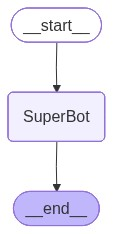

In [9]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Apoorv And I like Hockey"},config)
# {'messages': [HumanMessage(content='Hi,My name is Apoorv And I like Hockey', id='d429edae-e5d9-4e5e-8aa2-c5c61d563053'),
#   AIMessage(content="Nice to meet you, Apoorv! Hockey is an exciting sport, isn't it? Are you a fan of field hockey or ice hockey? Do you have a favorite team or player?", response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 47, 'total_tokens': 87, 'completion_time': 0.081972096, 'prompt_time': 0.011724538, 'queue_time': 0.049723822, 'total_time': 0.093696634}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-3817313c-ec62-41db-b615-27620afca53e-0', usage_metadata={'input_tokens': 47, 'output_tokens': 40, 'total_tokens': 87})]}
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

#{'SuperBot': {'messages': [AIMessage(content="Nice to meet you, Krish. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you more into international cricket or do you follow any specific domestic leagues like the IPL?", response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.120870421, 'prompt_time': 0.018074392, 'queue_time': 0.051935478, 'total_time': 0.138944813}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22c013d-38f4-4e0c-8910-3c2625a64c4a-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89})]}}
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)
# {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', id='be3bc4a9-77bd-480e-a59a-226f19454d67'), AIMessage(content="Nice to meet you, Krish. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you more into international cricket or do you follow any specific domestic leagues like the IPL?", response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.120870421, 'prompt_time': 0.018074392, 'queue_time': 0.051935478, 'total_time': 0.138944813}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22c013d-38f4-4e0c-8910-3c2625a64c4a-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89}), HumanMessage(content='I also like football', id='53667cb7-86c4-4743-acc4-634727605e9c')]}
# {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', id='be3bc4a9-77bd-480e-a59a-226f19454d67'), AIMessage(content="Nice to meet you, Krish. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you more into international cricket or do you follow any specific domestic leagues like the IPL?", response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.120870421, 'prompt_time': 0.018074392, 'queue_time': 0.051935478, 'total_time': 0.138944813}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22c013d-38f4-4e0c-8910-3c2625a64c4a-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89}), HumanMessage(content='I also like football', id='53667cb7-86c4-4743-acc4-634727605e9c'), AIMessage(content="You're a sports enthusiast, Krish. Cricket and football are two of the most popular sports in the world. It's great that you enjoy both.\n\nSo, in football, do you have a favorite team, player, or league? Are you a fan of the English Premier League, La Liga, or maybe the Champions League? And do you play either cricket or football yourself, or just enjoy watching them?", response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 102, 'total_tokens': 185, 'completion_time': 0.276174141, 'prompt_time': 0.015268496, 'queue_time': 0.045824724, 'total_time': 0.291442637}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-05964079-e4b1-47de-bacf-b09e421569c6-0', usage_metadata={'input_tokens': 102, 'output_tokens': 83, 'total_tokens': 185})]}
config = {"configurable": {"thread_id":"3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)
# C:\Users\sahus\AppData\Local\Temp\ipykernel_21656\3544168676.py:3: LangChainBetaWarning: This API is in beta and may change in the future.
#   async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
# {'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
# {'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', id='be3bc4a9-77bd-480e-a59a-226f19454d67'), AIMessage(content="Nice to meet you, Krish. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you more into international cricket or do you follow any specific domestic leagues like the IPL?", response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.120870421, 'prompt_time': 0.018074392, 'queue_time': 0.051935478, 'total_time': 0.138944813}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22c013d-38f4-4e0c-8910-3c2625a64c4a-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89}), HumanMessage(content='I also like football', id='53667cb7-86c4-4743-acc4-634727605e9c'), AIMessage(content="You're a sports enthusiast, Krish. Cricket and football are two of the most popular sports in the world. It's great that you enjoy both.\n\nSo, in football, do you have a favorite team, player, or league? Are you a fan of the English Premier League, La Liga, or maybe the Champions League? And do you play either cricket or football yourself, or just enjoy watching them?", response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 102, 'total_tokens': 185, 'completion_time': 0.276174141, 'prompt_time': 0.015268496, 'queue_time': 0.045824724, 'total_time': 0.291442637}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-05964079-e4b1-47de-bacf-b09e421569c6-0', usage_metadata={'input_tokens': 102, 'output_tokens': 83, 'total_tokens': 185}), HumanMessage(content='Hi My name is Krish and I like to play cricket', id='df650630-6f0a-4ec1-ad99-9cb9b65513bb')]}}, 'name': 'SuperBot', 'tags': ['graph:step:7'], 'run_id': '4a17afa5-fede-452e-8854-f4ebd9d61d73', 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11'}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6']}
# {'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi,My name is Krish And I like cricket', id='be3bc4a9-77bd-480e-a59a-226f19454d67'), AIMessage(content="Nice to meet you, Krish. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you more into international cricket or do you follow any specific domestic leagues like the IPL?", response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.120870421, 'prompt_time': 0.018074392, 'queue_time': 0.051935478, 'total_time': 0.138944813}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22c013d-38f4-4e0c-8910-3c2625a64c4a-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89}), HumanMessage(content='I also like football', id='53667cb7-86c4-4743-acc4-634727605e9c'), AIMessage(content="You're a sports enthusiast, Krish. Cricket and football are two of the most popular sports in the world. It's great that you enjoy both.\n\nSo, in football, do you have a favorite team, player, or league? Are you a fan of the English Premier League, La Liga, or maybe the Champions League? And do you play either cricket or football yourself, or just enjoy watching them?", response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 102, 'total_tokens': 185, 'completion_time': 0.276174141, 'prompt_time': 0.015268496, 'queue_time': 0.045824724, 'total_time': 0.291442637}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-05964079-e4b1-47de-bacf-b09e421569c6-0', usage_metadata={'input_tokens': 102, 'output_tokens': 83, 'total_tokens': 185}), HumanMessage(content='Hi My name is Krish and I like to play cricket', id='df650630-6f0a-4ec1-ad99-9cb9b65513bb')]]}}, 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='Nice', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' to', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' meet', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' you', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' again', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=',', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' Krish', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='.', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' It', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content="'s", id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' great', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' that', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' you', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' enjoy', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' playing', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' cricket', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='.', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' What', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' position', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' do', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' you', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' like', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' to', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' play', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' in', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='?', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' Are', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' you', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' a', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' bats', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='man', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=',', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' bow', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='ler', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=',', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' w', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='icket', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='-', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='keeper', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=',', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' or', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' an', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' all', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='-', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='rou', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='nder', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='?\n\n', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='Do', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' you', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' play', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' cricket', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' with', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' your', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' friends', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=',', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' in', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' a', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' local', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' club', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=',', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' or', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' as', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' part', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' of', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' a', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' school', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' team', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='?', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' And', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' what', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content="'s", id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' your', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' favorite', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' aspect', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' of', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' the', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' game', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' -', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' the', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' thrill', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' of', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' hitting', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' a', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' six', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=',', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' the', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' satisfaction', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' of', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' taking', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' a', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' w', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='icket', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=',', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' or', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' the', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' strategy', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' of', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' capt', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='aining', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' a', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content=' team', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='?', id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b')}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_stream', 'data': {'chunk': AIMessageChunk(content='', response_metadata={'finish_reason': 'stop'}, id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b', usage_metadata={'input_tokens': 205, 'output_tokens': 103, 'total_tokens': 308})}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chat_model_end', 'data': {'output': AIMessage(content="Nice to meet you again, Krish. It's great that you enjoy playing cricket. What position do you like to play in? Are you a batsman, bowler, wicket-keeper, or an all-rounder?\n\nDo you play cricket with your friends, in a local club, or as part of a school team? And what's your favorite aspect of the game - the thrill of hitting a six, the satisfaction of taking a wicket, or the strategy of captaining a team?", response_metadata={'finish_reason': 'stop'}, id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b', usage_metadata={'input_tokens': 205, 'output_tokens': 103, 'total_tokens': 308}), 'input': {'messages': [[HumanMessage(content='Hi,My name is Krish And I like cricket', id='be3bc4a9-77bd-480e-a59a-226f19454d67'), AIMessage(content="Nice to meet you, Krish. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you more into international cricket or do you follow any specific domestic leagues like the IPL?", response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.120870421, 'prompt_time': 0.018074392, 'queue_time': 0.051935478, 'total_time': 0.138944813}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22c013d-38f4-4e0c-8910-3c2625a64c4a-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89}), HumanMessage(content='I also like football', id='53667cb7-86c4-4743-acc4-634727605e9c'), AIMessage(content="You're a sports enthusiast, Krish. Cricket and football are two of the most popular sports in the world. It's great that you enjoy both.\n\nSo, in football, do you have a favorite team, player, or league? Are you a fan of the English Premier League, La Liga, or maybe the Champions League? And do you play either cricket or football yourself, or just enjoy watching them?", response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 102, 'total_tokens': 185, 'completion_time': 0.276174141, 'prompt_time': 0.015268496, 'queue_time': 0.045824724, 'total_time': 0.291442637}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-05964079-e4b1-47de-bacf-b09e421569c6-0', usage_metadata={'input_tokens': 102, 'output_tokens': 83, 'total_tokens': 185}), HumanMessage(content='Hi My name is Krish and I like to play cricket', id='df650630-6f0a-4ec1-ad99-9cb9b65513bb')]]}}, 'run_id': '00b72401-299e-4ea5-9cf6-230a42a8d50b', 'name': 'ChatGroq', 'tags': ['seq:step:1'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11', 'ls_provider': 'groq', 'ls_model_name': 'llama-3.3-70b-versatile', 'ls_model_type': 'chat', 'ls_temperature': 0.7}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', '4a17afa5-fede-452e-8854-f4ebd9d61d73']}
# {'event': 'on_chain_stream', 'run_id': '4a17afa5-fede-452e-8854-f4ebd9d61d73', 'name': 'SuperBot', 'tags': ['graph:step:7'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11'}, 'data': {'chunk': {'messages': [AIMessage(content="Nice to meet you again, Krish. It's great that you enjoy playing cricket. What position do you like to play in? Are you a batsman, bowler, wicket-keeper, or an all-rounder?\n\nDo you play cricket with your friends, in a local club, or as part of a school team? And what's your favorite aspect of the game - the thrill of hitting a six, the satisfaction of taking a wicket, or the strategy of captaining a team?", response_metadata={'finish_reason': 'stop'}, id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b', usage_metadata={'input_tokens': 205, 'output_tokens': 103, 'total_tokens': 308})]}}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6']}
# {'event': 'on_chain_end', 'data': {'output': {'messages': [AIMessage(content="Nice to meet you again, Krish. It's great that you enjoy playing cricket. What position do you like to play in? Are you a batsman, bowler, wicket-keeper, or an all-rounder?\n\nDo you play cricket with your friends, in a local club, or as part of a school team? And what's your favorite aspect of the game - the thrill of hitting a six, the satisfaction of taking a wicket, or the strategy of captaining a team?", response_metadata={'finish_reason': 'stop'}, id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b', usage_metadata={'input_tokens': 205, 'output_tokens': 103, 'total_tokens': 308})]}, 'input': {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', id='be3bc4a9-77bd-480e-a59a-226f19454d67'), AIMessage(content="Nice to meet you, Krish. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you more into international cricket or do you follow any specific domestic leagues like the IPL?", response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.120870421, 'prompt_time': 0.018074392, 'queue_time': 0.051935478, 'total_time': 0.138944813}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22c013d-38f4-4e0c-8910-3c2625a64c4a-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89}), HumanMessage(content='I also like football', id='53667cb7-86c4-4743-acc4-634727605e9c'), AIMessage(content="You're a sports enthusiast, Krish. Cricket and football are two of the most popular sports in the world. It's great that you enjoy both.\n\nSo, in football, do you have a favorite team, player, or league? Are you a fan of the English Premier League, La Liga, or maybe the Champions League? And do you play either cricket or football yourself, or just enjoy watching them?", response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 102, 'total_tokens': 185, 'completion_time': 0.276174141, 'prompt_time': 0.015268496, 'queue_time': 0.045824724, 'total_time': 0.291442637}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-05964079-e4b1-47de-bacf-b09e421569c6-0', usage_metadata={'input_tokens': 102, 'output_tokens': 83, 'total_tokens': 185}), HumanMessage(content='Hi My name is Krish and I like to play cricket', id='df650630-6f0a-4ec1-ad99-9cb9b65513bb')]}}, 'run_id': '4a17afa5-fede-452e-8854-f4ebd9d61d73', 'name': 'SuperBot', 'tags': ['graph:step:7'], 'metadata': {'thread_id': '3', 'langgraph_step': 7, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:625ab3b4-fcb1-7631-cbc0-6faa185cdd11'}, 'parent_ids': ['cfb7b41c-e0b2-47b4-bd50-231ccfae33e6']}
# {'event': 'on_chain_stream', 'run_id': 'cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', 'name': 'LangGraph', 'tags': [], 'metadata': {'thread_id': '3'}, 'data': {'chunk': {'SuperBot': {'messages': [AIMessage(content="Nice to meet you again, Krish. It's great that you enjoy playing cricket. What position do you like to play in? Are you a batsman, bowler, wicket-keeper, or an all-rounder?\n\nDo you play cricket with your friends, in a local club, or as part of a school team? And what's your favorite aspect of the game - the thrill of hitting a six, the satisfaction of taking a wicket, or the strategy of captaining a team?", response_metadata={'finish_reason': 'stop'}, id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b', usage_metadata={'input_tokens': 205, 'output_tokens': 103, 'total_tokens': 308})]}}}, 'parent_ids': []}
# {'event': 'on_chain_end', 'data': {'output': {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', id='be3bc4a9-77bd-480e-a59a-226f19454d67'), AIMessage(content="Nice to meet you, Krish. Cricket is a fantastic sport, isn't it? Which team or player is your favorite? Are you more into international cricket or do you follow any specific domestic leagues like the IPL?", response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.120870421, 'prompt_time': 0.018074392, 'queue_time': 0.051935478, 'total_time': 0.138944813}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run-c22c013d-38f4-4e0c-8910-3c2625a64c4a-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89}), HumanMessage(content='I also like football', id='53667cb7-86c4-4743-acc4-634727605e9c'), AIMessage(content="You're a sports enthusiast, Krish. Cricket and football are two of the most popular sports in the world. It's great that you enjoy both.\n\nSo, in football, do you have a favorite team, player, or league? Are you a fan of the English Premier League, La Liga, or maybe the Champions League? And do you play either cricket or football yourself, or just enjoy watching them?", response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 102, 'total_tokens': 185, 'completion_time': 0.276174141, 'prompt_time': 0.015268496, 'queue_time': 0.045824724, 'total_time': 0.291442637}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-05964079-e4b1-47de-bacf-b09e421569c6-0', usage_metadata={'input_tokens': 102, 'output_tokens': 83, 'total_tokens': 185}), HumanMessage(content='Hi My name is Krish and I like to play cricket', id='df650630-6f0a-4ec1-ad99-9cb9b65513bb'), AIMessage(content="Nice to meet you again, Krish. It's great that you enjoy playing cricket. What position do you like to play in? Are you a batsman, bowler, wicket-keeper, or an all-rounder?\n\nDo you play cricket with your friends, in a local club, or as part of a school team? And what's your favorite aspect of the game - the thrill of hitting a six, the satisfaction of taking a wicket, or the strategy of captaining a team?", response_metadata={'finish_reason': 'stop'}, id='run-00b72401-299e-4ea5-9cf6-230a42a8d50b', usage_metadata={'input_tokens': 205, 'output_tokens': 103, 'total_tokens': 308})]}}, 'run_id': 'cfb7b41c-e0b2-47b4-bd50-231ccfae33e6', 'name': 'LangGraph', 'tags': [], 'metadata': {'thread_id': '3'}, 'parent_ids': []}



{'messages': [HumanMessage(content='Hi,My name is Apoorv And I like Hockey', id='d429edae-e5d9-4e5e-8aa2-c5c61d563053'),
  AIMessage(content="Nice to meet you, Apoorv! Hockey is an exciting sport, isn't it? Are you a fan of field hockey or ice hockey? Do you have a favorite team or player?", response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 47, 'total_tokens': 87, 'completion_time': 0.081972096, 'prompt_time': 0.011724538, 'queue_time': 0.049723822, 'total_time': 0.093696634}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'finish_reason': 'stop', 'logprobs': None}, id='run-3817313c-ec62-41db-b615-27620afca53e-0', usage_metadata={'input_tokens': 47, 'output_tokens': 40, 'total_tokens': 87})]}